# ARIMA (AutoRegressive Integrated Moving Average) models 

Like ARMA models [link to quantopian on arma] ARIMA models models can be fitted to time series data to predict future points in the series where data show evidence of non-stationarity, so an initial differencing step (this is the "I" in ARIMA for Integrated part of the model) can be applied one or more times to eliminate the non-stationarity.

Wikipedia has a detailed description https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

Here I want to show how to estimate the parameters for a timeseries and make a prediction.  

First we'll get some data, then use Box-Jenkins to estimate the parameters, build the model and finally make a forecast.  

In [13]:
# Set up the pandas environment 
import pandas as pd
from pandas import Series, DataFrame, Panel

# Lets get some data from Quandl 
import quandl
crudeOilData = quandl.get("CHRIS/CME_CL1",returns="pandas") 	# pandas data series
heatingOilData = quandl.get("CHRIS/CME_HO1",returns="pandas") 

#print type (crudeOilData)
print crudeOilData
# Get the ratio of the closing prices  



             Open   High    Low   Last  Change  Settle     Volume  \
Date                                                                
1983-03-30  29.01  29.56  29.01  29.40     NaN   29.40      949.0   
1983-03-31  29.40  29.60  29.25  29.29     NaN   29.29      521.0   
1983-04-04  29.30  29.70  29.29  29.44     NaN   29.44      156.0   
1983-04-05  29.50  29.80  29.50  29.71     NaN   29.71      175.0   
1983-04-06  29.90  29.92  29.65  29.90     NaN   29.90      392.0   
1983-04-07  29.90  30.20  29.86  30.17     NaN   30.17      817.0   
1983-04-08  30.65  30.65  30.25  30.38     NaN   30.38      365.0   
1983-04-11  30.40  30.41  30.00  30.26     NaN   30.26      265.0   
1983-04-12  30.50  31.00  30.50  30.83     NaN   30.83      469.0   
1983-04-13  30.60  30.95  30.60  30.82     NaN   30.82      657.0   
1983-04-14  30.70  30.86  30.65  30.69     NaN   30.69      202.0   
1983-04-15  30.55  30.60  30.35  30.48     NaN   30.48      295.0   
1983-04-18  30.56  30.80  30.55  3

In [16]:
df = crudeOilData['Settle']
ratio = crudeOilData['Settle'].divide (heatingOilData['Settle'], fill_value=None).dropna()
print ratio.head

import pandas as pd
from pandas import Series, DataFrame, Panel
pd.__version__

<bound method Series.head of Date
1983-03-30    38.899180
1983-03-31    38.789564
1983-04-04    38.721557
1983-04-05    38.664758
1983-04-06    38.357922
1983-04-07    38.325711
1983-04-08    38.339223
1983-04-11    38.015075
1983-04-12    38.042942
1983-04-13    38.261949
1983-04-14    38.271605
1983-04-15    38.368580
1983-04-18    38.038100
1983-04-19    37.577905
1983-04-20    37.167070
1983-04-21    37.088975
1983-04-22    36.857246
1983-04-25    36.479773
1983-04-26    36.774039
1983-04-27    36.651584
1983-04-28    36.849676
1983-04-29    36.599355
1983-05-02    39.078259
1983-05-03    39.441355
1983-05-04    39.226306
1983-05-05    38.982832
1983-05-06    39.153915
1983-05-09    40.101252
1983-05-10    39.934124
1983-05-11    39.742740
                ...    
2018-01-29    31.147853
2018-01-30    31.133851
2018-01-31    31.282621
2018-02-01    31.477229
2018-02-02    31.872413
2018-02-05    31.763716
2018-02-06    31.932900
2018-02-07    31.993994
2018-02-08    31.827409
2018-0

u'0.22.0'

In [3]:
np.__version__

'1.6.1'

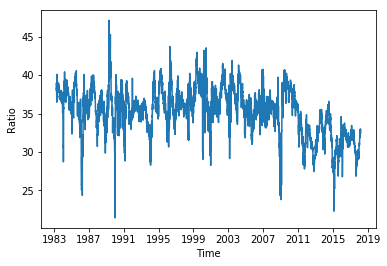

In [18]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ratio)
plt.xlabel('Time')
plt.ylabel('Ratio');



In [29]:
returns = ratio.pct_change()[1:]
print 'Max:', np.max(returns)
print 'Min:', np.min(returns)
print 'Skew:', stats.skew(returns)
print 'Mean:', np.mean(returns)
print 'Std:', np.std(returns)
print "Excess kurtosis of returns: ", stats.kurtosis(returns)


plt.plot(returns)
plt.xlabel('Time')
plt.ylabel('Ratio returns');


returnsClipped = stats.mstats.winsorize(returns, limits=0.05)
print 'Max:', np.max(returnsClipped)
print 'Min:', np.min(returnsClipped)
print 'Skew:', stats.skew(returnsClipped)
print 'Mean:', np.mean(returnsClipped)
print 'Std:', np.std(returnsClipped)
print "Excess kurtosis of returns: ", stats.kurtosis(returnsClipped)

plt.plot(returnsClipped)
#plt.xlabel('Time')
#plt.ylabel('Clipped ratio returns');








#plt.hist(returns, 30);

Max: 0.380869082506035
Min: -0.15670190044550603
Skew: 2.94006820252
Mean: 0.000131250812232
Std: 0.0175827422793
Excess kurtosis of returns:  53.0928857532
Max: 0.02098064233176311
Min: -0.020999638893309358
Skew: 0.00939331354329
Mean: -0.00012931220844284244
Std: 0.01055466431382345
Excess kurtosis of returns:  -0.374241261514


Error in callback <function post_execute at 0x110e43758> (for post_execute):


ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

In [ ]:
# Use Box-Jenkins to determine ARIMA parameters

###Example using tick data

Sample trade ticks from 2011-11-01 to 2011-11-03 for a single security

In [5]:
with open('data.csv', 'r') as fh:
    print fh.readline() # headers
    print fh.readline() # first row

Date,Time,Price,Volume,Exchange Code,Sales Condition,Correction Indicator,Sequence Number,Trade Stop Indicator,Source of Trade,MDS 127 / TRF (Trade Reporting Facility) (*),Exclude Record Flag,Filtered Price

11/01/2011,08:04:56.364,104.55,100,P,T,00,196,N,C,,,



`parse_dates`: use a list or dict for flexible (possibly multi-column) date parsing

In [6]:
data = pd.read_csv('data.csv', 
                    parse_dates={'Timestamp': ['Date', 'Time']},
                    index_col='Timestamp')
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14632 entries, 2011-11-01 08:04:56.364000 to 2011-11-03 16:09:47.834000
Data columns:
Price                                           14632  non-null values
Volume                                          14632  non-null values
Exchange Code                                   14632  non-null values
Sales Condition                                 14632  non-null values
Correction Indicator                            14632  non-null values
Sequence Number                                 14632  non-null values
Trade Stop Indicator                            14632  non-null values
Source of Trade                                 14632  non-null values
MDS 127 / TRF (Trade Reporting Facility) (*)    2421  non-null values
Exclude Record Flag                             28  non-null values
Filtered Price                                  0  non-null values
dtypes: float64(2), int64(3), object(6)

In [7]:
ticks = data.ix[:, ['Price', 'Volume']]
ticks.head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364000,104.55,100
2011-11-01 08:53:07.459000,104.43,150
2011-11-01 08:53:09.284000,104.43,100
2011-11-01 08:54:03.921000,104.50,100
2011-11-01 08:58:06.162000,104.46,1000


How stationary is stationary ?
Stationary proces are described here https://en.wikipedia.org/wiki/Stationary_process.  
For our purposes it's a time series whose mean and variance are constant over time.

####`resample`: regularization and frequency conversion

In [8]:
bars = ticks.Price.resample('1min', how='ohlc')
bars

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3366 entries, 2011-11-01 08:05:00 to 2011-11-03 16:10:00
Freq: T
Data columns:
open     1104  non-null values
high     1104  non-null values
low      1104  non-null values
close    1104  non-null values
dtypes: float64(4)

In [9]:
minute_range = bars.high - bars.low
minute_range.describe()

count    1104.000000
mean        0.017898
std         0.018568
min         0.000000
25%         0.000875
50%         0.013900
75%         0.029000
max         0.150000

In [10]:
minute_return = bars.close / bars.open - 1
minute_return.describe()

count    1104.000000
mean        0.000003
std         0.000191
min        -0.001442
25%        -0.000096
50%         0.000000
75%         0.000096
max         0.000962

Compute a VWAP using resample

In [11]:
volume = ticks.Volume.resample('1min', how='sum')
value = ticks.prod(axis=1).resample('1min', how='sum')
vwap = value / volume

####Convenient indexing for time series data

In [12]:
vwap.ix['2011-11-01 09:27':'2011-11-01 09:32']

Timestamp
2011-11-01 09:27:00           NaN
2011-11-01 09:28:00           NaN
2011-11-01 09:29:00    104.170000
2011-11-01 09:30:00    103.300800
2011-11-01 09:31:00    104.231368
2011-11-01 09:32:00    104.236679
Freq: T

####`at_time`: same (b)at_time (same bat channel)

In [13]:
bars.open.at_time('9:30')

Timestamp
2011-11-01 09:30:00    103.3008
2011-11-02 09:30:00    103.8600
2011-11-03 09:30:00         NaN
Name: open

In [14]:
bars.close.at_time('16:00')

Timestamp
2011-11-01 16:00:00    104.56
2011-11-02 16:00:00    104.32
2011-11-03 16:00:00    103.82
Name: close

####`between_time`: intraday time range

In [15]:
filtered = vwap.between_time('10:00', '16:00')
filtered.head(20)

Timestamp
2011-11-01 10:00:00    104.145000
2011-11-01 10:01:00    104.245387
2011-11-01 10:02:00    104.170771
2011-11-01 10:03:00    104.170000
2011-11-01 10:04:00    104.160952
2011-11-01 10:05:00    104.110870
2011-11-01 10:06:00    104.093576
2011-11-01 10:07:00    104.145132
2011-11-01 10:08:00    104.157924
2011-11-01 10:09:00    104.154646
2011-11-01 10:10:00    104.150756
2011-11-01 10:11:00    104.182591
2011-11-01 10:12:00    104.116803
2011-11-01 10:13:00    104.092174
2011-11-01 10:14:00    104.067768
2011-11-01 10:15:00    104.070000
2011-11-01 10:16:00    104.073333
2011-11-01 10:17:00    104.080906
2011-11-01 10:18:00    104.082566
2011-11-01 10:19:00    104.085140

In [16]:
vol = volume.between_time('10:00', '16:00')
vol.head(20)

Timestamp
2011-11-01 10:00:00      200
2011-11-01 10:01:00    18767
2011-11-01 10:02:00    67287
2011-11-01 10:03:00     2000
2011-11-01 10:04:00     2100
2011-11-01 10:05:00     2300
2011-11-01 10:06:00    11509
2011-11-01 10:07:00     3526
2011-11-01 10:08:00      734
2011-11-01 10:09:00     1106
2011-11-01 10:10:00     1800
2011-11-01 10:11:00     1760
2011-11-01 10:12:00     2961
2011-11-01 10:13:00     2300
2011-11-01 10:14:00     5818
2011-11-01 10:15:00      200
2011-11-01 10:16:00      600
2011-11-01 10:17:00     1040
2011-11-01 10:18:00     1576
2011-11-01 10:19:00     2813

####`fillna`: handling missing data

In [17]:
filtered.ix['2011-11-03':'2011-11-04'].head(20)

Timestamp
2011-11-03 10:00:00           NaN
2011-11-03 10:01:00    103.968667
2011-11-03 10:02:00           NaN
2011-11-03 10:03:00    103.997500
2011-11-03 10:04:00    104.044295
2011-11-03 10:05:00           NaN
2011-11-03 10:06:00    104.135118
2011-11-03 10:07:00    104.130000
2011-11-03 10:08:00    104.120000
2011-11-03 10:09:00    104.101250
2011-11-03 10:10:00           NaN
2011-11-03 10:11:00           NaN
2011-11-03 10:12:00           NaN
2011-11-03 10:13:00           NaN
2011-11-03 10:14:00    104.086667
2011-11-03 10:15:00    104.049200
2011-11-03 10:16:00    104.028333
2011-11-03 10:17:00    103.976438
2011-11-03 10:18:00    103.912492
2011-11-03 10:19:00           NaN

In [18]:
filled = filtered.fillna(method='pad', limit=1)
filled.ix['2011-11-03':'2011-11-04'].head(20)

Timestamp
2011-11-03 10:00:00    104.305099
2011-11-03 10:01:00    103.968667
2011-11-03 10:02:00    103.968667
2011-11-03 10:03:00    103.997500
2011-11-03 10:04:00    104.044295
2011-11-03 10:05:00    104.044295
2011-11-03 10:06:00    104.135118
2011-11-03 10:07:00    104.130000
2011-11-03 10:08:00    104.120000
2011-11-03 10:09:00    104.101250
2011-11-03 10:10:00    104.101250
2011-11-03 10:11:00           NaN
2011-11-03 10:12:00           NaN
2011-11-03 10:13:00           NaN
2011-11-03 10:14:00    104.086667
2011-11-03 10:15:00    104.049200
2011-11-03 10:16:00    104.028333
2011-11-03 10:17:00    103.976438
2011-11-03 10:18:00    103.912492
2011-11-03 10:19:00    103.912492

In [19]:
vol = vol.fillna(0.)
vol.head(20)

Timestamp
2011-11-01 10:00:00      200
2011-11-01 10:01:00    18767
2011-11-01 10:02:00    67287
2011-11-01 10:03:00     2000
2011-11-01 10:04:00     2100
2011-11-01 10:05:00     2300
2011-11-01 10:06:00    11509
2011-11-01 10:07:00     3526
2011-11-01 10:08:00      734
2011-11-01 10:09:00     1106
2011-11-01 10:10:00     1800
2011-11-01 10:11:00     1760
2011-11-01 10:12:00     2961
2011-11-01 10:13:00     2300
2011-11-01 10:14:00     5818
2011-11-01 10:15:00      200
2011-11-01 10:16:00      600
2011-11-01 10:17:00     1040
2011-11-01 10:18:00     1576
2011-11-01 10:19:00     2813

####Simple plotting

(103.5, 104.5)

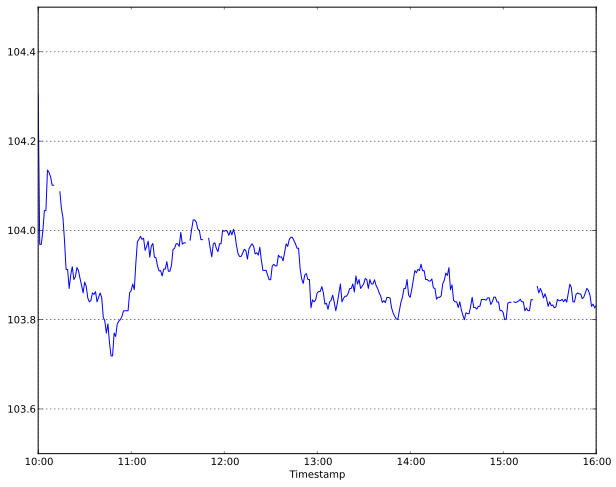

In [20]:
filled.ix['2011-11-03':'2011-11-04'].plot()
plt.ylim(103.5, 104.5)

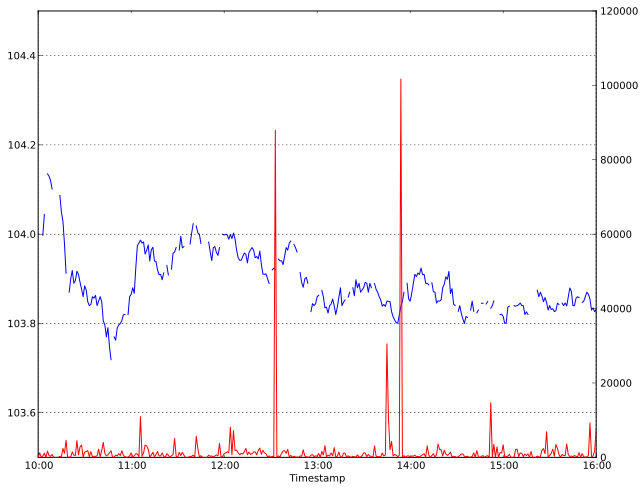

In [21]:
vwap.ix['2011-11-03':'2011-11-04'].plot()
plt.ylim(103.5, 104.5)
vol.ix['2011-11-03':'2011-11-04'].plot(secondary_y=True, style='r')

####Lead/lag

In [22]:
ticks.head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364000,104.55,100
2011-11-01 08:53:07.459000,104.43,150
2011-11-01 08:53:09.284000,104.43,100
2011-11-01 08:54:03.921000,104.50,100
2011-11-01 08:58:06.162000,104.46,1000


**`shift`** realigns values

In [23]:
ticks.shift(1).head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364000,NaN,NaN
2011-11-01 08:53:07.459000,104.55,100
2011-11-01 08:53:09.284000,104.43,150
2011-11-01 08:54:03.921000,104.43,100
2011-11-01 08:58:06.162000,104.50,100


In [24]:
ticks.shift(-1).head()

,Price,Volume
Timestamp,,
2011-11-01 08:04:56.364000,104.43,150
2011-11-01 08:53:07.459000,104.43,100
2011-11-01 08:53:09.284000,104.50,100
2011-11-01 08:54:03.921000,104.46,1000
2011-11-01 08:58:06.162000,104.46,1000


**`tshift`** manipulates index values

In [25]:
ticks.tshift(1, 'min').head()

,Price,Volume
2011-11-01 08:05:56.364000,104.55,100
2011-11-01 08:54:07.459000,104.43,150
2011-11-01 08:54:09.284000,104.43,100
2011-11-01 08:55:03.921000,104.50,100
2011-11-01 08:59:06.162000,104.46,1000


####SSS: stupidly simple strategy

In [26]:
minute_return.head()

Timestamp
2011-11-01 08:05:00     0
2011-11-01 08:06:00   NaN
2011-11-01 08:07:00   NaN
2011-11-01 08:08:00   NaN
2011-11-01 08:09:00   NaN
Freq: T

In [27]:
mr = minute_return.between_time('9:30', '16:00')
mr.head()

Timestamp
2011-11-01 09:30:00    0.000000
2011-11-01 09:31:00    0.000192
2011-11-01 09:32:00   -0.000192
2011-11-01 09:33:00    0.000000
2011-11-01 09:34:00   -0.000096

In [28]:
lagged = mr.shift(1)
lagged.head()

Timestamp
2011-11-01 09:30:00         NaN
2011-11-01 09:31:00    0.000000
2011-11-01 09:32:00    0.000192
2011-11-01 09:33:00   -0.000192
2011-11-01 09:34:00    0.000000

We shouldn't use shift here because:

In [29]:
lagged.at_time('9:30')

Timestamp
2011-11-01 09:30:00         NaN
2011-11-02 09:30:00    0.000191
2011-11-03 09:30:00    0.000192

In [30]:
mr.at_time('16:00')

Timestamp
2011-11-01 16:00:00    0.000191
2011-11-02 16:00:00    0.000192
2011-11-03 16:00:00   -0.000193

In [31]:
lagged = minute_return.tshift(1, 'min').between_time('9:30', '16:00')
lagged.at_time('9:30')

Timestamp
2011-11-01 09:30:00     0
2011-11-02 09:30:00     0
2011-11-03 09:30:00   NaN

Let's play

In [32]:
pd.ols(y=mr, x=lagged)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1009
Number of Degrees of Freedom:   2

R-squared:         0.0011
Adj R-squared:     0.0001

Rmse:              0.0002

F-stat (1, 1007):     1.1007, p-value:     0.2944

Degrees of Freedom: model 1, resid 1007

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0338     0.0322       1.05     0.2944    -0.0293     0.0969
     intercept     0.0000     0.0000       0.50     0.6148    -0.0000     0.0000
---------------------------------End of Summary---------------------------------


In [33]:
mr = vwap / bars.open - 1
mr = mr.between_time('9:30', '16:00')
lagged = mr.tshift(1, 'min').between_time('9:30', '16:00')
pd.ols(y=mr, x=lagged)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         1007
Number of Degrees of Freedom:   2

R-squared:         0.0024
Adj R-squared:     0.0014

Rmse:              0.0001

F-stat (1, 1005):     2.4262, p-value:     0.1196

Degrees of Freedom: model 1, resid 1005

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.0503     0.0323       1.56     0.1196    -0.0130     0.1136
     intercept     0.0000     0.0000       0.66     0.5120    -0.0000     0.0000
---------------------------------End of Summary---------------------------------


In [34]:
inter = mr * vol
inter = inter.between_time('9:30', '16:00')
lagged_inter = inter.tshift(1, 'min').between_time('9:30', '16:00')
pd.ols(y=mr, x=lagged_inter)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         919
Number of Degrees of Freedom:   2

R-squared:         0.0055
Adj R-squared:     0.0044

Rmse:              0.0001

F-stat (1, 917):     5.0453, p-value:     0.0249

Degrees of Freedom: model 1, resid 917

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0000     0.0000      -2.25     0.0249    -0.0000    -0.0000
     intercept     0.0000     0.0000       0.98     0.3251    -0.0000     0.0000
---------------------------------End of Summary---------------------------------


Convert to percentage volume

In [35]:
vol = vol.groupby(vol.index.day).transform(lambda x: x/x.sum())
vol.head()

Timestamp
2011-11-01 10:00:00    0.000115
2011-11-01 10:01:00    0.010772
2011-11-01 10:02:00    0.038624
2011-11-01 10:03:00    0.001148
2011-11-01 10:04:00    0.001205

Verify

In [36]:
vol.resample('D', how='sum')

Timestamp
2011-11-02    1
2011-11-03    1
2011-11-04    1
Freq: D

In [37]:
inter = mr * vol
inter = inter.between_time('9:30', '16:00')
lagged_inter = inter.tshift(1, 'min').between_time('9:30', '16:00')
pd.ols(y=mr, x=lagged_inter)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         919
Number of Degrees of Freedom:   2

R-squared:         0.0050
Adj R-squared:     0.0039

Rmse:              0.0001

F-stat (1, 917):     4.6031, p-value:     0.0322

Degrees of Freedom: model 1, resid 917

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -4.1357     1.9276      -2.15     0.0322    -7.9139    -0.3576
     intercept     0.0000     0.0000       0.98     0.3283    -0.0000     0.0000
---------------------------------End of Summary---------------------------------


Vivaldi FTW

In [38]:
hour = vol.index.hour
hourly_volume = vol.groupby(hour).mean()

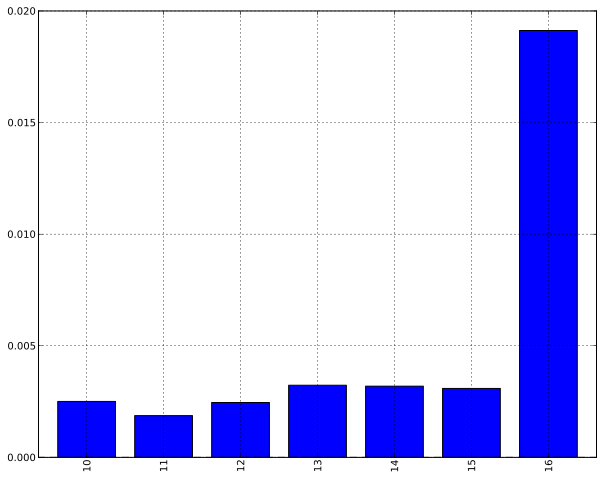

In [39]:
hourly_volume.plot(kind='bar')

Expanding window of hourly means for volume

In [40]:
hourly = vol.resample('H')

def calc_mean(hr):
    hr = time(hour=hr)
    data = hourly.at_time(hr)
    return pd.expanding_mean(data)

df = pd.concat([calc_mean(hr) for hr in range(10, 16)])
df = df.sort_index()
df

Timestamp
2011-11-01 10:00:00    0.000115
2011-11-01 11:00:00    0.002510
2011-11-01 12:00:00    0.001253
2011-11-01 13:00:00    0.000628
2011-11-01 14:00:00    0.003013
2011-11-01 15:00:00    0.004419
2011-11-02 10:00:00    0.000742
2011-11-02 11:00:00    0.002986
2011-11-02 12:00:00    0.002283
2011-11-02 13:00:00    0.001088
2011-11-02 14:00:00    0.002224
2011-11-02 15:00:00    0.003979
2011-11-03 10:00:00    0.000495
2011-11-03 11:00:00    0.002537
2011-11-03 12:00:00    0.002102
2011-11-03 13:00:00    0.002193
2011-11-03 14:00:00    0.003233
2011-11-03 15:00:00    0.003228

Compute deviations from the hourly means

In [41]:
clean_vol = vol.between_time('10:00', '15:59')
dev = clean_vol - df.reindex(clean_vol.index, method='pad') # be careful over day boundaries
dev

Timestamp
2011-11-01 10:00:00    0.000000
2011-11-01 10:01:00    0.010658
2011-11-01 10:02:00    0.038509
2011-11-01 10:03:00    0.001033
2011-11-01 10:04:00    0.001091
2011-11-01 10:05:00    0.001205
2011-11-01 10:06:00    0.006492
2011-11-01 10:07:00    0.001909
2011-11-01 10:08:00    0.000307
2011-11-01 10:09:00    0.000520
2011-11-01 10:10:00    0.000918
2011-11-01 10:11:00    0.000895
2011-11-01 10:12:00    0.001585
2011-11-01 10:13:00    0.001205
2011-11-01 10:14:00    0.003225
...
2011-11-03 15:45:00   -0.002881
2011-11-03 15:46:00   -0.002411
2011-11-03 15:47:00   -0.002708
2011-11-03 15:48:00   -0.002881
2011-11-03 15:49:00   -0.001083
2011-11-03 15:50:00   -0.003228
2011-11-03 15:51:00   -0.001469
2011-11-03 15:52:00   -0.003054
2011-11-03 15:53:00   -0.003054
2011-11-03 15:54:00   -0.003054
2011-11-03 15:55:00   -0.002303
2011-11-03 15:56:00    0.012786
2011-11-03 15:57:00   -0.003054
2011-11-03 15:58:00   -0.002521
2011-11-03 15:59:00   -0.000219
Length: 1080

In [42]:
inter = mr * dev
inter = inter.between_time('10:00', '15:59')
pd.ols(y=mr, x=inter.tshift(1, 'min'))


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         919
Number of Degrees of Freedom:   2

R-squared:         0.0059
Adj R-squared:     0.0048

Rmse:              0.0001

F-stat (1, 917):     5.3977, p-value:     0.0204

Degrees of Freedom: model 1, resid 917

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -4.6532     2.0029      -2.32     0.0204    -8.5789    -0.7276
     intercept     0.0000     0.0000       0.97     0.3299    -0.0000     0.0000
---------------------------------End of Summary---------------------------------


###Date range creation

`pd.date_range`

In [43]:
rng = pd.date_range('2005', '2012', freq='M')
rng

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-31 00:00:00, ..., 2012-09-30 00:00:00]
Length: 84, Freq: M, Timezone: None

In [44]:
pd.date_range('2005', periods=7*12, freq='M')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-31 00:00:00, ..., 2012-09-30 00:00:00]
Length: 84, Freq: M, Timezone: None

In [45]:
pd.date_range(end='2012', periods=7*12, freq='M')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-31 00:00:00, ..., 2012-09-30 00:00:00]
Length: 84, Freq: M, Timezone: None

#### Frequency constants

<table>
    <tr><td>Name</td><td>Description</td></tr>
    <tr><td>D</td><td>Calendar day</td></tr>
    <tr><td>B</td><td>Business day</td></tr>
    <tr><td>M</td><td>Calendar end of month</td></tr>
    <tr><td>MS</td><td>Calendar start of month</td></tr>
    <tr><td>BM</td><td>Business end of month</td></tr>
    <tr><td>BMS</td><td>Business start of month</td></tr>
    <tr><td>W-{MON, TUE,...}</td><td>Week ending on Monday, Tuesday, ...</td></tr>
    <tr><td>Q-{JAN, FEB,...}</td><td>Quarter end with year ending January, February...</td></tr>
    <tr><td>QS-{JAN, FEB,...}</td><td>Quarter start with year ending January, February...</td></tr>
    <tr><td>BQ-{JAN, FEB,...}</td><td>Business quarter end with year ending January, February...</td></tr>
    <tr><td>BQS-{JAN, FEB,...}</td><td>Business quarter start with year ending January, February...</td></tr>
    <tr><td>A-{JAN, FEB, ...}</td><td>Year end (December)</td></tr>
    <tr><td>AS-{JAN, FEB, ...}</td><td>Year start (December)</td></tr>    
    <tr><td>BA-{JAN, FEB, ...}</td><td>Business year end (December)</td></tr>  
    <tr><td>BAS-{JAN, FEB, ...}</td><td>Business year start (December)</td></tr>  
    <tr><td>H</td><td>Hour</td></tr>
    <tr><td>T</td><td>Minute</td></tr>
    <tr><td>s</td><td>Second</td></tr>
    <tr><td>L, ms</td><td>Millisecond</td></tr>
    <tr><td>U</td><td>Microsecond</td></tr>
</table>

Anchored offsets

In [46]:
pd.date_range('2005', periods=4, freq='Q')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-12-31 00:00:00, ..., 2006-09-30 00:00:00]
Length: 4, Freq: Q-DEC, Timezone: None

In [47]:
pd.date_range('2005', periods=4, freq='Q-NOV')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-11-30 00:00:00, ..., 2006-08-31 00:00:00]
Length: 4, Freq: Q-NOV, Timezone: None

Week anchor indicates end of week

In [48]:
wkrng = pd.date_range('2012-10-25', periods=3, freq='W')
wkrng

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-10-28 00:00:00, ..., 2012-11-11 00:00:00]
Length: 3, Freq: W-SUN, Timezone: None

In [49]:
wkrng[0].dayofweek

6

Year anchor indicates year ending month

In [50]:
pd.date_range('2005', periods=3, freq='A-JUN')

<class 'pandas.tseries.index.DatetimeIndex'>
[2006-06-30 00:00:00, ..., 2008-06-30 00:00:00]
Length: 3, Freq: A-JUN, Timezone: None

`DatetimeIndex` is a subclass of Index

In [51]:
isinstance(rng, pd.Index)

True

In [52]:
rng[2:4]

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-12-31 00:00:00, 2006-01-31 00:00:00]
Length: 2, Freq: M, Timezone: None

Use it for `Series/DataFrame` labelling

In [53]:
s = Series(randn(len(rng)), rng)
s.head()

2005-10-31    1.026565
2005-11-30   -0.306949
2005-12-31   -1.838600
2006-01-31   -1.325459
2006-02-28    1.642384
Freq: M

In [54]:
df = DataFrame(randn(len(rng), 3), rng, ['X', 'Y', 'Z'])
df.head()

,X,Y,Z
2005-10-31,-0.256664,0.255390,-0.765260
2005-11-30,2.035113,1.694331,1.436986
2005-12-31,1.094142,-1.098397,0.643988
2006-01-31,0.714353,0.429468,0.702067
2006-02-28,0.318068,0.656602,1.701144


####Label indexing

In [55]:
s[datetime(2005, 1, 31) : datetime(2006, 12, 31)] #slice end inclusive

2005-10-31    1.026565
2005-11-30   -0.306949
2005-12-31   -1.838600
2006-01-31   -1.325459
2006-02-28    1.642384
2006-03-31   -0.274467
2006-04-30   -0.433675
2006-05-31   -0.963449
2006-06-30    1.112873
2006-07-31   -0.089778
2006-08-31    0.046948
2006-09-30    0.035094
2006-10-31    1.113169
2006-11-30   -0.401821
2006-12-31    0.723640
Freq: M

In [56]:
df['2005-1-31':'2006-12-31']

,X,Y,Z
2005-10-31,-0.256664,0.255390,-0.765260
2005-11-30,2.035113,1.694331,1.436986
2005-12-31,1.094142,-1.098397,0.643988
2006-01-31,0.714353,0.429468,0.702067
2006-02-28,0.318068,0.656602,1.701144
2006-03-31,0.192433,1.127046,-2.496724
2006-04-30,1.417775,0.845626,-0.713990
2006-05-31,0.057333,0.016464,-0.311196
2006-06-30,-0.535289,0.131742,0.459589
2006-07-31,-0.787894,-1.482390,-0.341181


**Partial indexing**

In [57]:
s['2005':'2006']

2005-10-31    1.026565
2005-11-30   -0.306949
2005-12-31   -1.838600
2006-01-31   -1.325459
2006-02-28    1.642384
2006-03-31   -0.274467
2006-04-30   -0.433675
2006-05-31   -0.963449
2006-06-30    1.112873
2006-07-31   -0.089778
2006-08-31    0.046948
2006-09-30    0.035094
2006-10-31    1.113169
2006-11-30   -0.401821
2006-12-31    0.723640
Freq: M

positional indexing still works

In [58]:
df[:2] # slice end exclusive

,X,Y,Z
2005-10-31,-0.256664,0.255390,-0.765260
2005-11-30,2.035113,1.694331,1.436986


####Elements of DatetimeIndex

Elements boxed as `Timestamp` (subclass of `datetime.datetime`)

In [59]:
elm = rng[0]
elm

<Timestamp: 2005-10-31 00:00:00>

In [60]:
isinstance(elm, datetime)

True

Why do we need this subclass?

In [61]:
elm.nanosecond

0

Implemented internally using numpy.datetime64 (dtype='M8[ns]')

In [62]:
val = rng.values

In [63]:
type(val)

numpy.ndarray

In [64]:
val.dtype

dtype('datetime64[ns]')

Upgrade Numpy to 1.7b to fix repr issue

In [65]:
val[0]

1970-01-14 40:00:00

Or use DatetimeIndex.asobject for workaround

In [66]:
rng.asobject.values[0]

<Timestamp: 2005-10-31 00:00:00>

#### Other views

In [67]:
rng.asobject

Index([2005-10-31 00:00:00, 2005-11-30 00:00:00, 2005-12-31 00:00:00, 2006-01-31 00:00:00, 2006-02-28 00:00:00, 2006-03-31 00:00:00, 2006-04-30 00:00:00, 2006-05-31 00:00:00, 2006-06-30 00:00:00, 2006-07-31 00:00:00, 2006-08-31 00:00:00, 2006-09-30 00:00:00, 2006-10-31 00:00:00, 2006-11-30 00:00:00, 2006-12-31 00:00:00, 2007-01-31 00:00:00, 2007-02-28 00:00:00, 2007-03-31 00:00:00, 2007-04-30 00:00:00, 2007-05-31 00:00:00, 2007-06-30 00:00:00, 2007-07-31 00:00:00, 2007-08-31 00:00:00, 2007-09-30 00:00:00, 2007-10-31 00:00:00, 2007-11-30 00:00:00, 2007-12-31 00:00:00, 2008-01-31 00:00:00, 2008-02-29 00:00:00, 2008-03-31 00:00:00, 2008-04-30 00:00:00, 2008-05-31 00:00:00, 2008-06-30 00:00:00, 2008-07-31 00:00:00, 2008-08-31 00:00:00, 2008-09-30 00:00:00, 2008-10-31 00:00:00, 2008-11-30 00:00:00, 2008-12-31 00:00:00, 2009-01-31 00:00:00, 2009-02-28 00:00:00, 2009-03-31 00:00:00, 2009-04-30 00:00:00, 2009-05-31 00:00:00, 2009-06-30 00:00:00, 2009-07-31 00:00:00, 2009-08-31 00:00:00, 2009-0

In [68]:
rng.to_pydatetime()

array([2005-10-31 00:00:00, 2005-11-30 00:00:00, 2005-12-31 00:00:00,
       2006-01-31 00:00:00, 2006-02-28 00:00:00, 2006-03-31 00:00:00,
       2006-04-30 00:00:00, 2006-05-31 00:00:00, 2006-06-30 00:00:00,
       2006-07-31 00:00:00, 2006-08-31 00:00:00, 2006-09-30 00:00:00,
       2006-10-31 00:00:00, 2006-11-30 00:00:00, 2006-12-31 00:00:00,
       2007-01-31 00:00:00, 2007-02-28 00:00:00, 2007-03-31 00:00:00,
       2007-04-30 00:00:00, 2007-05-31 00:00:00, 2007-06-30 00:00:00,
       2007-07-31 00:00:00, 2007-08-31 00:00:00, 2007-09-30 00:00:00,
       2007-10-31 00:00:00, 2007-11-30 00:00:00, 2007-12-31 00:00:00,
       2008-01-31 00:00:00, 2008-02-29 00:00:00, 2008-03-31 00:00:00,
       2008-04-30 00:00:00, 2008-05-31 00:00:00, 2008-06-30 00:00:00,
       2008-07-31 00:00:00, 2008-08-31 00:00:00, 2008-09-30 00:00:00,
       2008-10-31 00:00:00, 2008-11-30 00:00:00, 2008-12-31 00:00:00,
       2009-01-31 00:00:00, 2009-02-28 00:00:00, 2009-03-31 00:00:00,
       2009-04-30 00

In [69]:
rng.to_pydatetime()[0]

datetime.datetime(2005, 10, 31, 0, 0)

Integer representation

In [70]:
type(rng.asi8)

numpy.ndarray

In [71]:
rng.asi8.dtype

dtype('int64')

In [72]:
rng.asi8[0]

1130716800000000000

###More fun with resampling and asfreq

In [73]:
s.index.freqstr

'M'

In [74]:
s.resample('30D').head(10)

2005-10-31    1.026565
2005-11-30   -0.306949
2005-12-30         NaN
2006-01-29         NaN
2006-02-28    1.642384
2006-03-30         NaN
2006-04-29         NaN
2006-05-29         NaN
2006-06-28         NaN
2006-07-28         NaN
Freq: 30D

In [75]:
s.resample('30D', fill_method='ffill').head(10)

2005-10-31    1.026565
2005-11-30   -0.306949
2005-12-30   -0.306949
2006-01-29   -1.838600
2006-02-28    1.642384
2006-03-30    1.642384
2006-04-29   -0.274467
2006-05-29   -0.433675
2006-06-28   -0.963449
2006-07-28    1.112873
Freq: 30D

Upsampling

In [76]:
s.ix[:3].resample('W')

2005-11-06   NaN
2005-11-13   NaN
2005-11-20   NaN
2005-11-27   NaN
2005-12-04   NaN
2005-12-11   NaN
2005-12-18   NaN
2005-12-25   NaN
2006-01-01   NaN
Freq: W-SUN

In [77]:
s.ix[:3].resample('W', fill_method='ffill')

2005-11-06    1.026565
2005-11-13    1.026565
2005-11-20    1.026565
2005-11-27    1.026565
2005-12-04   -0.306949
2005-12-11   -0.306949
2005-12-18   -0.306949
2005-12-25   -0.306949
2006-01-01   -1.838600
Freq: W-SUN

asfreq

In [78]:
s.asfreq('Q').head()

2005-12-31   -1.838600
2006-03-31   -0.274467
2006-06-30    1.112873
2006-09-30    0.035094
2006-12-31    0.723640
Freq: Q-DEC

In [79]:
s.resample('Q', 'last').head()

2005-12-31   -1.838600
2006-03-31   -0.274467
2006-06-30    1.112873
2006-09-30    0.035094
2006-12-31    0.723640
Freq: Q-DEC

closed: 'left' or 'right' bin edge is closed (default is 'right')

In [80]:
s.resample('Q').head()

2005-12-31   -0.372995
2006-03-31    0.014153
2006-06-30   -0.094750
2006-09-30   -0.002579
2006-12-31    0.478330
Freq: Q-DEC

In [81]:
s.ix[3:6].mean()

0.014152740332844638

In [82]:
s.resample('Q', closed='left').head()

2005-12-31    0.359808
2006-03-31   -0.507225
2006-06-30   -0.557197
2006-09-30    0.356681
2006-12-31    0.248814
Freq: Q-DEC

In [83]:
s.ix[2:5].mean()

-0.50722477768944352

label: label the bin with 'left' or 'right' edge (default is 'right')

In [84]:
s.resample('Q').head()

2005-12-31   -0.372995
2006-03-31    0.014153
2006-06-30   -0.094750
2006-09-30   -0.002579
2006-12-31    0.478330
Freq: Q-DEC

In [85]:
s.resample('Q', label='left').head()

2005-09-30   -0.372995
2005-12-31    0.014153
2006-03-31   -0.094750
2006-06-30   -0.002579
2006-09-30    0.478330
Freq: Q-DEC

loffset: shift the result index

In [86]:
s.resample('Q', label='left', loffset='-1D').head()

2005-09-29   -0.372995
2005-12-30    0.014153
2006-03-30   -0.094750
2006-06-29   -0.002579
2006-09-29    0.478330

###Time zones

####Localization

In [87]:
rng.tz

In [88]:
d = rng[0]
d

<Timestamp: 2005-10-31 00:00:00>

In [89]:
d.tz

In [90]:
localized = rng.tz_localize('US/Eastern')

Localization assumes naive time is local (and not UTC)

In [91]:
localized[0]

<Timestamp: 2005-10-31 00:00:00-0500 EST, tz=US/Eastern>

In [92]:
localized.asi8[0]

1130734800000000000

In [93]:
rng.asi8[0]

1130716800000000000

In [94]:
d_utc = d.tz_localize('UTC')
d_utc

<Timestamp: 2005-10-31 00:00:00+0000 UTC, tz=UTC>

In [95]:
d_utc.tz_localize('US/Eastern')

Exception: Cannot localize tz-aware Timestamp, use tz_convert for conversions

####TZ conversions

In [96]:
localized.tz_convert('UTC')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-31 05:00:00, ..., 2012-09-30 04:00:00]
Length: 84, Freq: M, Timezone: UTC

In [97]:
d_ny = d_utc.tz_convert('US/Eastern')
d_ny

<Timestamp: 2005-10-30 19:00:00-0500 EST, tz=US/Eastern>

In [98]:
rng.tz_convert('US/Eastern')

Exception: Cannot convert tz-naive timestamps, use tz_localize to localize

### Period representation

A lot of time series data is better represented as intervals of time rather than points in time.

This is represented in _pandas_ as Period and PeriodIndex

####Creating periods

In [99]:
p = pd.Period('2005', 'A')
p

Period('2005', 'A-DEC')

In [100]:
pd.Period('2006Q1', 'Q-MAR')

Period('2006Q1', 'Q-MAR')

In [101]:
pd.Period('2007-1-1', 'B')

Period('2007-01-01', 'B')

No xxx-start frequencies

In [102]:
pd.Period('2005', 'AS')

KeyError: 'AS-JAN'

####PeriodRange

In [103]:
pd.period_range('2005', '2012', freq='A')

<class 'pandas.tseries.period.PeriodIndex'>
freq: A-DEC
[2005, ..., 2012]
length: 8

In [104]:
prng = pd.period_range('2005', periods=7, freq='A')
prng

<class 'pandas.tseries.period.PeriodIndex'>
freq: A-DEC
[2005, ..., 2011]
length: 7

####Converting between representations

In [105]:
p

Period('2005', 'A-DEC')

In [106]:
p.to_timestamp()

<Timestamp: 2005-01-01 00:00:00>

In [107]:
p.to_timestamp('M', 's')

<Timestamp: 2005-01-31 00:00:00>

In [108]:
p.to_timestamp('M', 'e')

<Timestamp: 2005-12-31 00:00:00>

In [109]:
prng.to_timestamp(how='e')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-12-31 00:00:00, ..., 2011-12-31 00:00:00]
Length: 7, Freq: A-DEC, Timezone: None

In [110]:
prng.to_timestamp('M', 'e')

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-12-31 00:00:00, ..., 2011-12-31 00:00:00]
Length: 7, Freq: A-DEC, Timezone: None

In [111]:
rng

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-31 00:00:00, ..., 2012-09-30 00:00:00]
Length: 84, Freq: M, Timezone: None

In [112]:
rng.to_period()

<class 'pandas.tseries.period.PeriodIndex'>
freq: M
[2005-10, ..., 2012-09]
length: 84

In [113]:
rng.to_period('D')

<class 'pandas.tseries.period.PeriodIndex'>
freq: D
[2005-10-31, ..., 2012-09-30]
length: 84

####Bugggg

In [114]:
p

Period('2005', 'A-DEC')

In [115]:
p.end_time

<Timestamp: 2005-12-31 00:00:00>

In [116]:
datetime(2005, 12, 31, 10, 0, 0) < p.end_time # WAT?!

False

Look for a 0.9.1 bugfix release next week